In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
def get_batches(*args, batch_size=32):
    num_bathes = int(np.ceil(len(args[0]) / batch_size))
    for i in range(num_bathes):
        yield [arg[i*batch_size:(i + 1) * batch_size] for arg in args]


def stochastic_gradient_descent(X, y, lr=0.01):
    np.random.seed(42)
    index = np.arange(X.shape[0])
    weights = [np.random.randn(n, 1)]
    loss = []
    np.random.shuffle(index)
    for i in index:

        ypred = X[i:i+1] @ weights[-1]
        loss.append(((X@weights[-1] - y)**2).mean())
        dL = ypred - y[i:i+1]
        dw = X[i:i+1].T @ dL
        new_w = weights[-1] - lr * (dw)
        weights.append(new_w)
    return loss, weights


def batch_gradient_descent(X, y, lr=0.001):
    np.random.seed(42)
    weights = [np.random.randn(n, 1)]
    loss = []
    for i in range(10):
        ypred = X @ weights[-1]
        loss.append(((X@weights[-1] - y)**2).mean())
        dL = ypred - y
        dw = X.T @ dL
        new_w = weights[-1] - lr * (dw)
        weights.append(new_w)
    return loss, weights


def minibatch_gradient_descent(X, y, lr=0.01, batch_size=8):
    np.random.seed(42)
    weights = [np.random.randn(n, 1)]
    loss = []
    for xx, yy in get_batches(X, y, batch_size=batch_size):
        ypred = xx @ weights[-1]
        loss.append(((X@weights[-1] - y)**2).mean())
        dL = ypred - yy
        dw = xx.T @ dL
        new_w = weights[-1] - lr * (dw)
        weights.append(new_w)
    return loss, weights

In [3]:
M = 70
n = 2
np.random.seed(42)
X = np.random.randn(M, n)
b = np.random.randn(n, 1)
e = np.random.randn(M, 1)
y = X @ b + e

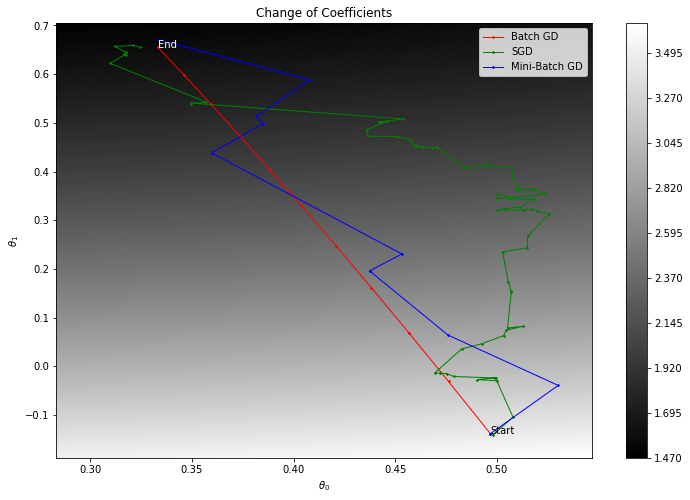

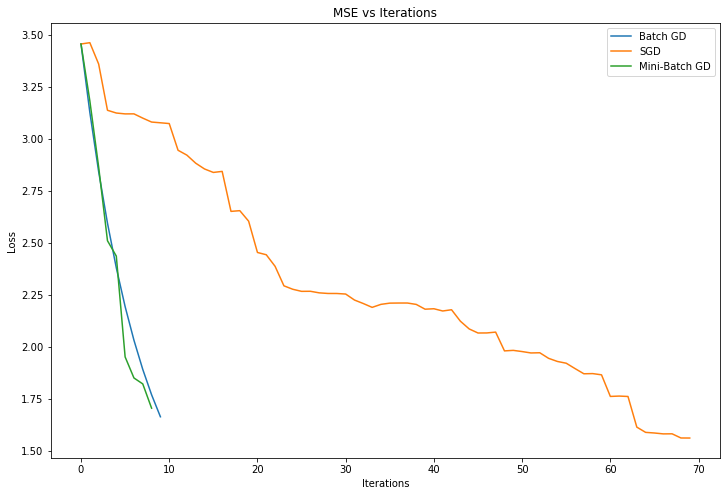

In [4]:
l, w = batch_gradient_descent(X, y)
w = np.array(w)[:, :, 0]

theta0, theta1 = np.meshgrid(
    np.linspace(
        w.T[0].min() - 0.05,
        w.T[0].max() + 0.05,
        100
        ),
    np.linspace(
        w.T[1].min() - 0.05,
        w.T[1].max() + 0.05,
        100
        )
)

ths = np.array([theta0.ravel(), theta1.ravel()])

preds = X @ ths

losses = ((preds - y)**2).mean(axis=0)
l2, w2 = stochastic_gradient_descent(X, y)
l3, w3 = minibatch_gradient_descent(X, y)

w2 = np.array(w2)[:,:,0]
w3 = np.array(w3)[:,:,0]

plt.figure(figsize=(12, 8))
plt.contourf(
    theta0,
    theta1,
    losses.reshape(
        theta0.shape
        ),
    levels=200,
    cmap='gray'
    )
plt.plot(*w.T, '*-', color='red', markersize=2, linewidth=1, label='Batch GD')
plt.plot(*w2.T, '*-', color='green', markersize=2, linewidth=1, label='SGD')
plt.plot(*w3.T, '*-', color='blue', markersize=2, linewidth=1, label='Mini-Batch GD')
plt.colorbar()
plt.text(*w[0], 'Start', color='k')
plt.text(*w[-1], 'End', color='w')
plt.xlabel('$\\theta_0$')
plt.ylabel('$\\theta_1$')
plt.title("Change of Coefficients")
plt.legend()

plt.figure(figsize=(12, 8))
pd.Series(l).plot(label='Batch GD')
pd.Series(l2[::1]).plot(label='SGD')
pd.Series(l3).plot(label='Mini-Batch GD')
plt.title('MSE vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend()
